In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
files_path = '/content/drive/MyDrive/ColabNotebooks/Datasets/'
df = pd.read_csv(files_path + 'HBN.csv')
dict_df = pd.read_csv(files_path + 'data_dictionary.csv')


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Enrol_Season', 'Age', 'Sex', 'CGAS-Season',
       'CGAS-Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'FE-Season', 'FE-Max_Stage', 'FE-Time_Mins', 'FE-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
   

In [ ]:
dict_df[dict_df['نام ستون'] == 'PreInt_EduHx-computerinternet_hoursday']

,حوزه,نام ستون,توضیحات به انگلیسی,توضیحات,نوع,مقادیر,برچسب‌های مقادیر
80,Internet Use,PreInt_EduHx-computerinternet_hoursday,Hours of using computer/internet,ساعات استفاده از اینترنت یا کامپیوتر,categorical int,"0,1,2,3","0=Less than 1h/day, 1=Around 1h/day, 2=Around ..."


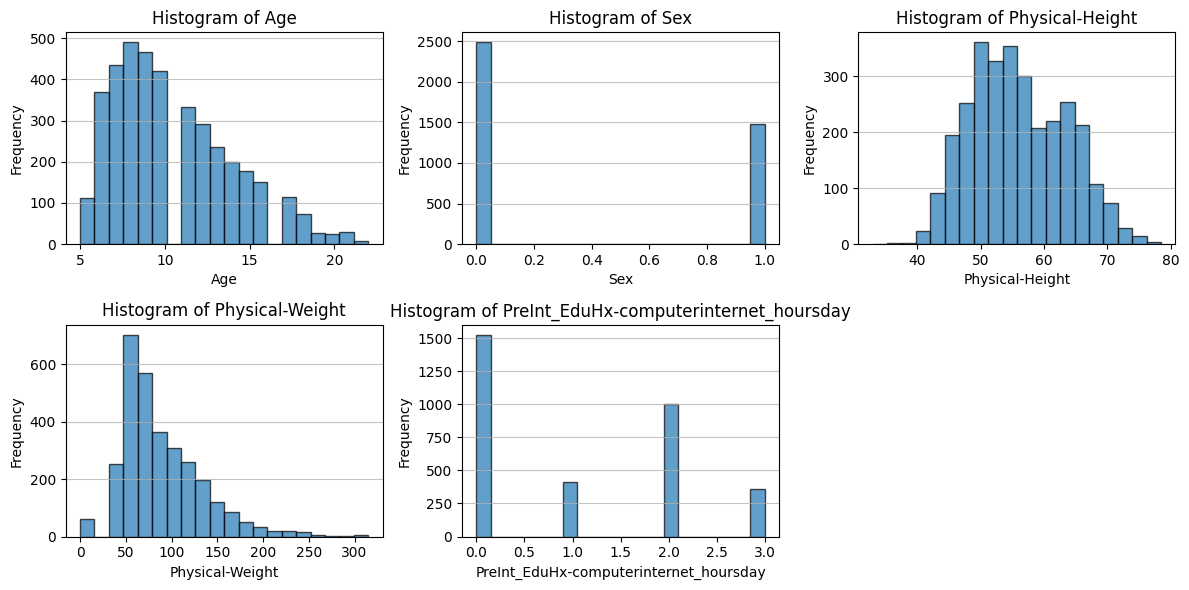

In [ ]:
columns_hist_list = ['Age', 'Sex', 'Physical-Height', 'Physical-Weight', 'PreInt_EduHx-computerinternet_hoursday']

fig, axes = plt.subplots(2, 3, figsize=(12, 6))  # Adjust size

axes = axes.flatten()  # Flatten axes array for easy iteration

for i, col in enumerate(columns_hist_list):
    if col in df.columns:
        axes[i].hist(df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].grid(axis='y', alpha=0.75)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


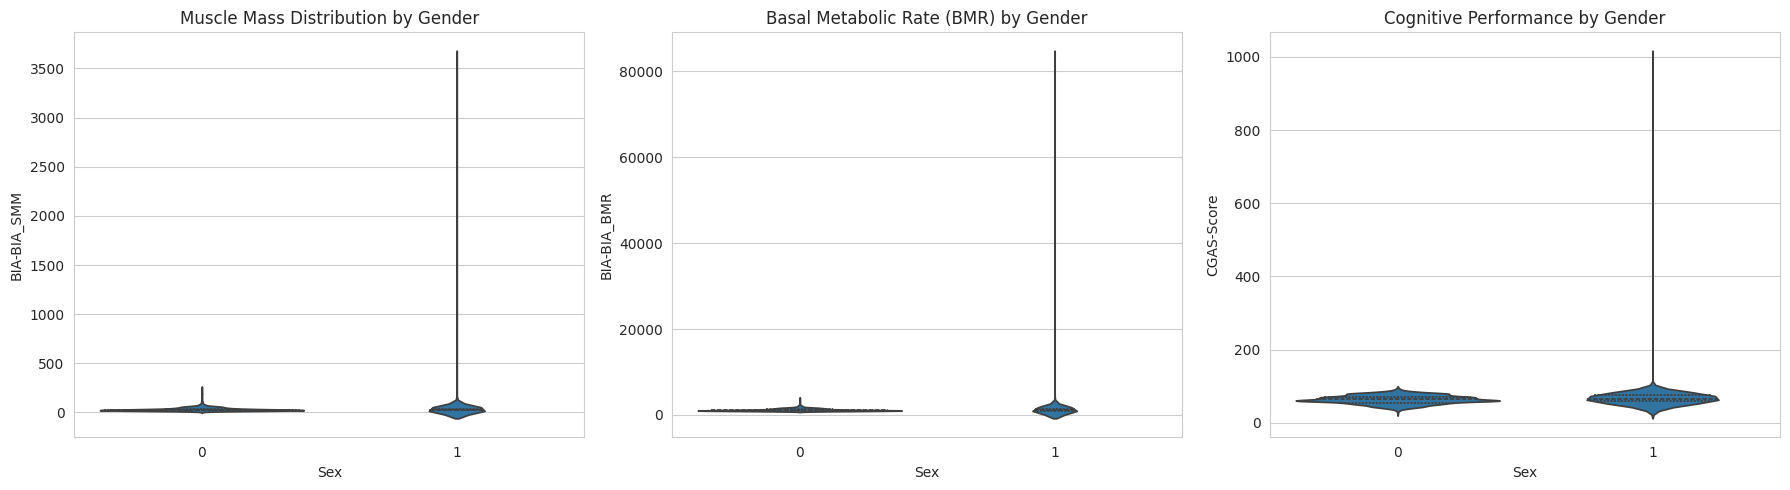

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Violin Plot
sns.violinplot(x="Sex", y="BIA-BIA_SMM", data=df, ax=axes[0], inner="quartile")
axes[0].set_title("Muscle Mass Distribution by Gender")

sns.violinplot(x="Sex", y="BIA-BIA_BMR", data=df, ax=axes[1], inner="quartile")
axes[1].set_title("Basal Metabolic Rate (BMR) by Gender")

sns.violinplot(x="Sex", y="CGAS-Score", data=df, ax=axes[2], inner="quartile")
axes[2].set_title("Cognitive Performance by Gender")

plt.tight_layout()
plt.show()


In [30]:
missing_list = []
for id in df['id']:
    try:
        parquet = pd.read_parquet(files_path + f'series.parquet//id={id}', engine='pyarrow')
        mean_light = parquet.aggregate({
          'light': 'mean'

        })
        # filtered the data -> weared the wristband and had movement
        steps_count = len(parquet[(parquet['non-wear_flag'] == 0) & (parquet['enmo'] != 0)])
        # number of steps, mean light that our case had exposed to
        df.loc[df['id'] == id, 'mean_light'] = mean_light.loc['light']
        df.loc[df['id'] == id, 'steps_count'] = steps_count
    except:
        missing_list.append(id)
print(len(missing_list))


2964


In [51]:
parquet['weekday'].value_counts()

,count
weekday,
2,69120
3,62268
1,60252
4,51840
5,51840
6,51840
7,51840


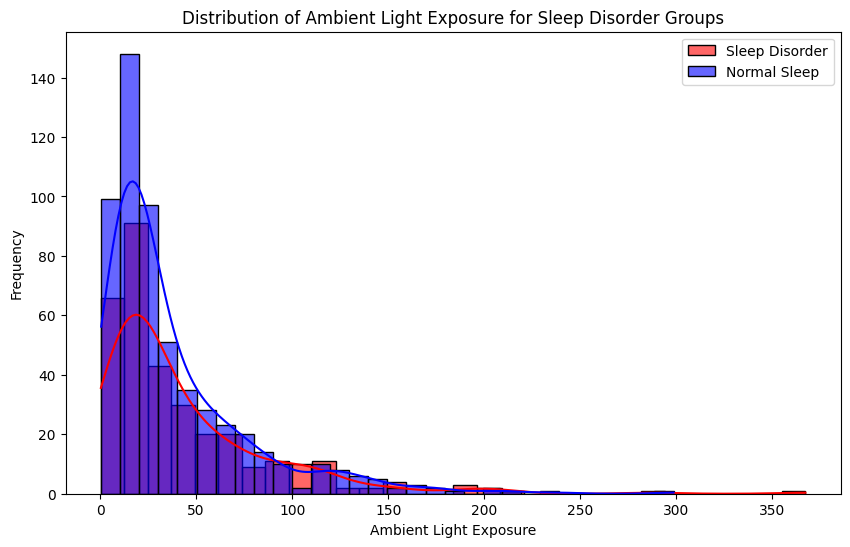

In [37]:
# Q4
cases_with_sleep_disorders = df[(df['SDS-SDS_Total_T'] <= 50) & (pd.notna(df['mean_light']))]
cases_with_normal_sleep = df[(df['SDS-SDS_Total_T'] > 50) & (pd.notna(df['mean_light']))]

plt.figure(figsize=(10, 6))
sns.histplot(cases_with_sleep_disorders['mean_light'], color='red', label='Sleep Disorder', kde=True, bins=30, alpha=0.6)
sns.histplot(cases_with_normal_sleep['mean_light'], color='blue', label='Normal Sleep', kde=True, bins=30, alpha=0.6)

# Labels and title
plt.xlabel("Ambient Light Exposure")
plt.ylabel("Frequency")
plt.title("Distribution of Ambient Light Exposure for Sleep Disorder Groups")
plt.legend()
plt.show()

In [39]:
df.columns

Index(['Unnamed: 0', 'id', 'Enrol_Season', 'Age', 'Sex', 'CGAS-Season',
       'CGAS-Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'FE-Season', 'FE-Max_Stage', 'FE-Time_Mins', 'FE-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
   

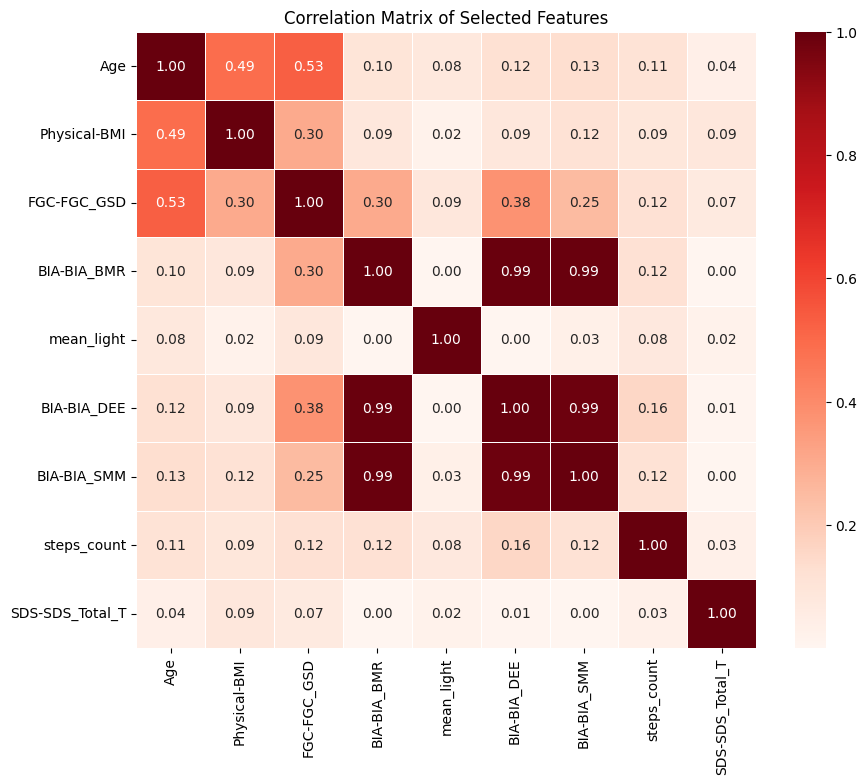

In [48]:
# Q5
required_columns = [
    "Age",  # سن
    "Physical-BMI",  # شاخص توده‌ی بدنی
    "FGC-FGC_GSD",  # تست قدرت با دست غالب
    "BIA-BIA_BMR",  # نرخ متابولیسم پایه
    "mean_light",  # میانگین نور محیطی در روز
    "BIA-BIA_DEE",  # مصرف انرژی روزانه
    "BIA-BIA_SMM",  # توده‌ی عضله‌ی خالص
    "steps_count",  #  تعداد گام در یک روز
    "SDS-SDS_Total_T"  # نمره‌ی T اختلال خواب
]

# correlation matrix
correlation_matrix = df[required_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(abs(correlation_matrix), annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Selected Features")
plt.show()

In [55]:
seasonal_avg_steps = parquet.groupby('quarter')['steps_count'].mean().reset_index()
seasonal_avg_steps

KeyError: 'Column not found: steps_count'

In [53]:
df.head()

,Unnamed: 0,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,...,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,mean_light,steps_count
0,0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,...,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,NaN,NaN
1,1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,...,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,NaN,NaN
2,2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,...,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,NaN,NaN
3,3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,...,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,42.29631,40759.0
4,4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Q6
weekly_steps_df = pd.DataFrame(columns=["weekday", "steps_count"])
seasonal_steps_df = pd.DataFrame(columns=["quarter", "steps_count"])


for id in df['id']:
    if id in missing_list:
      continue
    else:
        parquet = pd.read_parquet(files_path + f'series.parquet//id={id}', engine='pyarrow')
        valid_steps = parquet[(parquet['enmo'] != 0) & (parquet['non-wear_flag'] == 0)]
        steps_per_day = valid_steps.groupby("weekday").size().reset_index(name="steps_count")
        steps_per_season = valid_steps.groupby("quarter").size().reset_index(name="steps_count")
    weekly_steps_df = pd.concat([weekly_steps_df, steps_per_day], ignore_index=True)
    seasonal_steps_df = pd.concat([seasonal_steps_df, steps_per_season], ignore_index=True)

final_weekly_steps = weekly_steps_df.groupby("weekday")["steps_count"].sum().reset_index()
final_seasonal_steps = seasonal_steps_df.groupby("quarter")["steps_count"].mean().reset_index()

<ipython-input-63-acb3687e8fa0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_weekly_steps['weekday'], y=final_weekly_steps['steps_count'], palette="Blues")


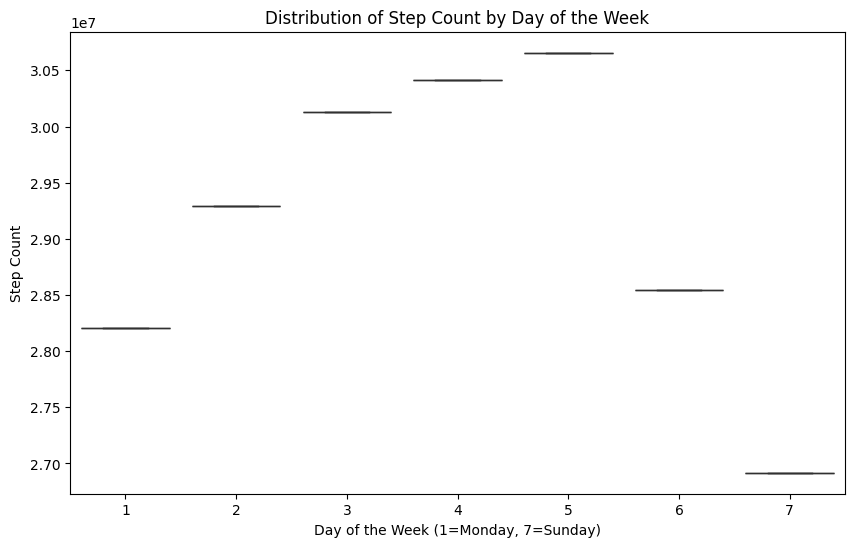

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_weekly_steps['weekday'], y=final_weekly_steps['steps_count'], palette="Blues")
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Step Count")
plt.title("Distribution of Step Count by Day of the Week")
plt.show()

<ipython-input-66-8e44d07de319>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_seasonal_steps['quarter'], y=final_seasonal_steps['steps_count'], palette="Reds")


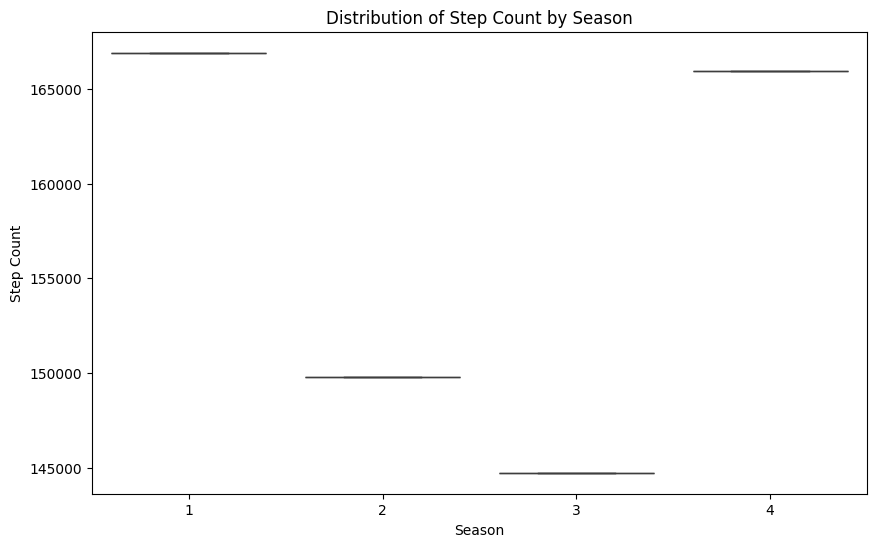

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_seasonal_steps['quarter'], y=final_seasonal_steps['steps_count'], palette="Reds")
plt.xlabel("Season")
plt.ylabel("Step Count")
plt.title("Distribution of Step Count by Season")
plt.show()